In [1]:
from algorithm_ranking import MeasurementsVisualizer, MeasurementsManager, RankVariantsSort2
from am4pa.linnea import LinneaConfig, MeasurementsLinnea

In [2]:
linnea_config = LinneaConfig("MatrixChain4",12)
linnea_config.set_local_directory("linnea/matrix-chain-4/")
linnea_config.setup_backend_details(server="login18-1.hpc.itc.rwth-aachen.de",
                                   uname = "as641651",
                                   init_script="~/.analyzer",
                                   backend_dir="~/PhD/PartialRanking/linnea/matrix-chain-4/")

In [3]:
linnea_config.connect_backend()

In [4]:
linnea_config.check_backend_folder_sync()

True

In [5]:
op_sizes = ["1000","1000","1000","1000","1000"]
ms = MeasurementsLinnea(linnea_config,op_sizes)
bRun = False

In [6]:
ms.generate_variants(bGenerate=bRun)

In [7]:
ms.gather_competing_variants()

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/PartialRanking/linnea/matrix-chain-4/experiments/1000_1000_1000_1000_1000/case_table.csv linnea/matrix-chain-4/cluster-data/1000_1000_1000_1000_1000
b''


['algorithm0',
 'algorithm2',
 'algorithm4',
 'algorithm1',
 'algorithm5',
 'algorithm3']

In [8]:
if bRun:
    ms.measure(20,1,bSlrum=True)

In [9]:
linnea_config.bm.check_slrum_status(ms.runner.job_name)

['             JOBID PARTITION                           NAME     USER    STATE       TIME TIME_LIMI  NODES NODELIST(REASON)\n']


0

In [10]:
ms.data_collector.delete_local_data()
ms.collect_measurements(1)

removing  linnea/matrix-chain-4/cluster-data/1000_1000_1000_1000_1000/case_table.csv
removing  linnea/matrix-chain-4/cluster-data/1000_1000_1000_1000_1000/run_times_competing_2.csv
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/PartialRanking/linnea/matrix-chain-4/experiments/1000_1000_1000_1000_1000/run_times_competing_1.csv linnea/matrix-chain-4/cluster-data/1000_1000_1000_1000_1000
b''


In [11]:
ms.h0.sort()

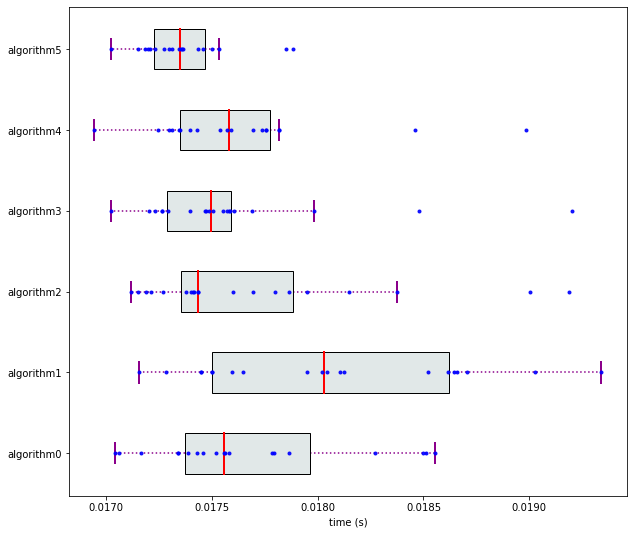

In [12]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), ms.h0)
fig = mv.show_measurements_boxplots()

In [13]:
#fig.savefig("run-intro-1.pdf", format="pdf", bbox_inches="tight")

In [71]:
df = ms.data_collector.get_meta_table()

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/PartialRanking/linnea/matrix-chain-4/experiments/1000_1000_1000_1000_1000/event_meta_table.csv linnea/matrix-chain-4/cluster-data/1000_1000_1000_1000_1000
b''


In [77]:
print(df[df['case:concept:name']=='algorithm0']['concept:operation'].tolist())
print(df[df['case:concept:name']=='algorithm1']['concept:operation'].tolist())
print(df[df['case:concept:name']=='algorithm2']['concept:operation'].tolist())
print(df[df['case:concept:name']=='algorithm3']['concept:operation'].tolist())
print(df[df['case:concept:name']=='algorithm4']['concept:operation'].tolist())
print(df[df['case:concept:name']=='algorithm5']['concept:operation'].tolist())

['tmp3 = (C D)', 'tmp5 = (B tmp3)', 'tmp6 = (A tmp5)']
['tmp1 = (A B)', 'tmp3 = (C D)', 'tmp6 = (tmp1 tmp3)']
['tmp2 = (B C)', 'tmp4 = (A tmp2)', 'tmp6 = (tmp4 D)']
['tmp3 = (C D)', 'tmp1 = (A B)', 'tmp6 = (tmp1 tmp3)']
['tmp2 = (B C)', 'tmp5 = (tmp2 D)', 'tmp6 = (A tmp5)']
['tmp1 = (A B)', 'tmp4 = (tmp1 C)', 'tmp6 = (tmp4 D)']


In [90]:
remap = {
    'algorithm0':'algorithm5', #((AB)C)D
    'algorithm1':'algorithm2', #(A(BC))D
    'algorithm2':'algorithm1', #(AB)(CD)
    'algorithm3':'algorithm3', #(CD)(AB)
    'algorithm4':'algorithm4', #A((BC)D)
    'algorithm5':'algorithm0' #A(B(CD))
}

In [91]:
ms.h0

['algorithm0',
 'algorithm1',
 'algorithm2',
 'algorithm3',
 'algorithm4',
 'algorithm5']

In [92]:
remapped = {}

for alg in ms.h0:
    remapped[alg]  = ms.get_alg_measurements()[remap[alg]]

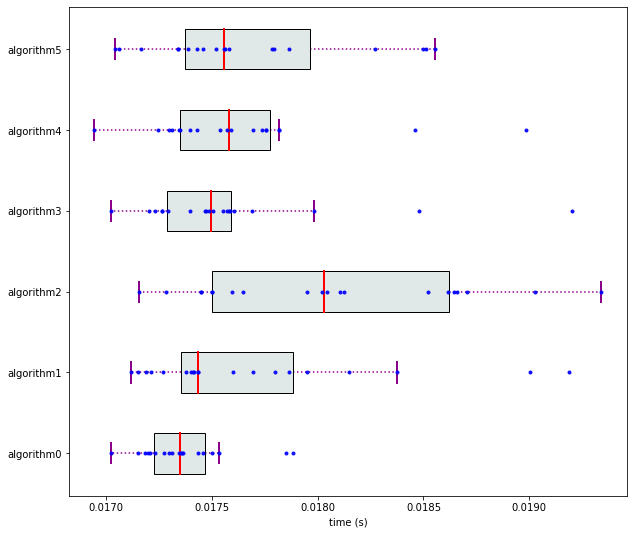

In [93]:
mv = MeasurementsVisualizer(remapped, ms.h0)
fig = mv.show_measurements_boxplots()

In [89]:
fig.savefig("run-intro-1.pdf", format="pdf", bbox_inches="tight")